<a href="https://colab.research.google.com/github/AKHIL-882/Data-Science-Internship/blob/main/DataScience_Task_4_Sentimental%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sentimental Analysis of News HeadLines**

**Aim: To perform sentimental analysis of news headlines**

### **Importing the Required Libraries**

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt        #Visualisation
import seaborn as sns                  #Visualisation
%matplotlib inline


**Reading dataset directly from google and
Printing the first 5 rows of the dataset**

In [2]:

dataset = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/DPQMQH/P2Z4PM')
dataset.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


**Printing the last 5 rows of the dataset**

In [3]:
dataset.tail()

,publish_date,headline_category,headline_text
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


### **1. Exploratory Data Analysis - Checking the types of data and basic summary stats.**

There are three features - **Publish Data, HeadLine Category and HeadLine Text**.The main aim is to do **sentimental analysis** of the news HeadLines.

**1.1 Displaying datatype of each column and also display the non-null row**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


**Observation**: We can find that only the **publish_date is of integer type** where as **headline_category and headline_text are of object**

**1.2 Finding the categorical variables**

In [5]:
dataset['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
ballot-talk                     7
sports.headline3                7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

**1.3 Dividing the news based on cities**

In [6]:
city_vise = dataset[dataset['headline_category'].str.contains('^city\.[a-z]+$', regex=True
                                                               )]
city_vise

,publish_date,headline_category,headline_text
274,20010104,city.bengaluru,Three in race for chief secy's post
275,20010104,city.patna,Druggists' stir leads to shortage of medicines
278,20010104,city.bengaluru,He's not so inscrutable
279,20010104,city.delhi,DPCC stages Nyay rally
643,20010110,city.patna,Fend for yourselves; Pande tells doctors
...,...,...,...
3297139,20200630,city.delhi,Remove illegal signage or face penalty: NDMC
3297158,20200630,city.bengaluru,what bengaluru can do to tackle covid surge
3297161,20200630,city.bengaluru,karnataka may adopt keralas triple lockdown plan
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...


**Observation**: Now we have split the dataset based on cities for easy analysis

**1.4 Seperating city name from dataset**

In [7]:
city = pd.DataFrame(columns=['city_name'])

In [8]:
city['city_name'] = city_vise.headline_category.str.split('.',expand=True)[1]

In [9]:
city_vise = pd.concat([city_vise,city],axis = 1)

In [10]:
city_vise.drop(columns=['headline_category'],axis=1,inplace=True)

In [11]:
city_vise.reset_index(inplace = True)

In [12]:
city_vise.head()

,index,publish_date,headline_text,city_name
0,274,20010104,Three in race for chief secy's post,bengaluru
1,275,20010104,Druggists' stir leads to shortage of medicines,patna
2,278,20010104,He's not so inscrutable,bengaluru
3,279,20010104,DPCC stages Nyay rally,delhi
4,643,20010110,Fend for yourselves; Pande tells doctors,patna


In [13]:
city_vise.city_name.unique()

array(['bengaluru', 'patna', 'delhi', 'ahmedabad', 'thiruvananthapuram',
       'pune', 'mumbai', 'chandigarh', 'lucknow', 'kolkata', 'hyderabad',
       'chennai', 'bareilly', 'aurangabad', 'nagpur', 'bhopal',
       'vadodara', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru',
       'mysuru', 'rajkot', 'surat', 'kanpur', 'varanasi', 'allahabad',
       'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'gurgaon',
       'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode',
       'nashik', 'raipur', 'visakhapatnam', 'kolhapur', 'navimumbai',
       'trichy', 'puducherry', 'dehradun', 'meerut', 'agra', 'vijayawada',
       'jamshedpur', 'imphal', 'shillong', 'amritsar', 'shimla',
       'cuttack', 'jind', 'agartala', 'jammu', 'faridabad', 'srinagar',
       'salem', 'rajahmundry', 'erode', 'ghaziabad', 'itanagar', 'ajmer',
       'kohima', 'gaya', 'jodhpur', 'udaipur', 'amaravati'], dtype=object)

**1.5 Finding the city with most headlines**

In [14]:
city_head = city_vise.groupby(['city_name']).agg({'headline_text':'count'})

In [15]:
city_headline_count = city_head.sort_values(by='headline_text',ascending=False)
most_headline_city = city_headline_count.head(10)
most_headline_city

,headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620
lucknow,83591
kolkata,81298


**1.6 Visualizing the headline count**

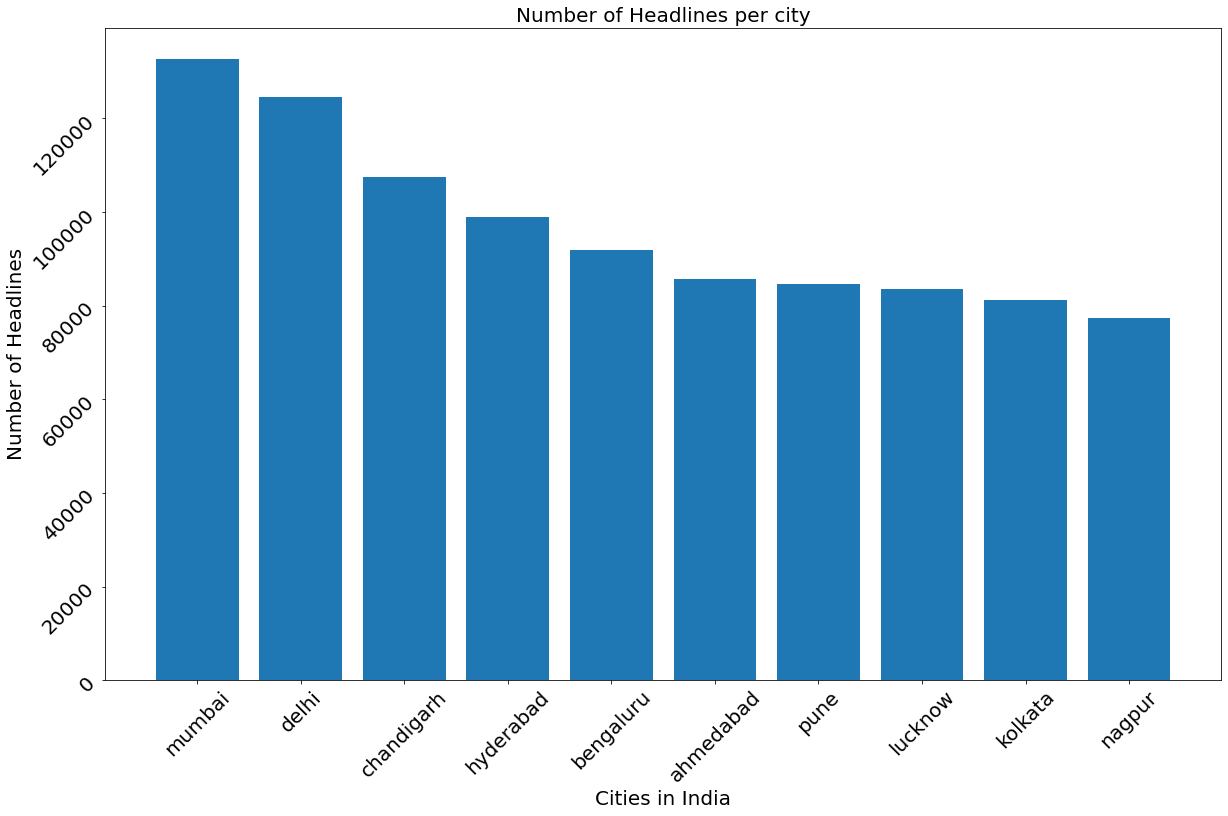

In [16]:
plt.figure(figsize=(20,12))
plt.bar(most_headline_city.index,height=most_headline_city['headline_text'])
plt.xticks(rotation = 45,fontsize=20)
plt.yticks(rotation = 45,fontsize=20)
plt.xlabel('Cities in India',fontsize=20)
plt.ylabel('Number of Headlines',fontsize=20)
plt.title('Number of Headlines per city',fontsize=20)
plt.show()

**Observation**: We can find that **Mumbai** has highest headlines over the remaining countries followed by **Delhi** and **Chandigarh**

### **2. Checking Year and Most coverage cities**

**2.1 Converting the publish_data datatype as date time**

In [17]:
city_vise['publish_date'] = pd.to_datetime(city_vise['publish_date'])
city_vise.head()

,index,publish_date,headline_text,city_name
0,274,1970-01-01 00:00:00.020010104,Three in race for chief secy's post,bengaluru
1,275,1970-01-01 00:00:00.020010104,Druggists' stir leads to shortage of medicines,patna
2,278,1970-01-01 00:00:00.020010104,He's not so inscrutable,bengaluru
3,279,1970-01-01 00:00:00.020010104,DPCC stages Nyay rally,delhi
4,643,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna


**2.2 Extracting the Year**

In [18]:
city_vise['Year'] = city_vise['publish_date'].apply(lambda x: (x.microsecond)//10)

In [19]:
city_vise.drop(columns=['publish_date','index'],axis=1,inplace=True)

In [20]:
city_vise.head()

,headline_text,city_name,Year
0,Three in race for chief secy's post,bengaluru,2001
1,Druggists' stir leads to shortage of medicines,patna,2001
2,He's not so inscrutable,bengaluru,2001
3,DPCC stages Nyay rally,delhi,2001
4,Fend for yourselves; Pande tells doctors,patna,2001


**2.3 Creating a new column to count headlines**

In [21]:
city_vise_dup = city_vise.copy()
city_vise_dup['Headlines Count'] = 1
city_vise_dup.head()

,headline_text,city_name,Year,Headlines Count
0,Three in race for chief secy's post,bengaluru,2001,1
1,Druggists' stir leads to shortage of medicines,patna,2001,1
2,He's not so inscrutable,bengaluru,2001,1
3,DPCC stages Nyay rally,delhi,2001,1
4,Fend for yourselves; Pande tells doctors,patna,2001,1


In [22]:
most_headline_city.head()

,headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857


In [23]:
city_vise_year_count = pd.Series(city_vise_dup.groupby(['Year'])['headline_text'].count())


In [24]:
city_vise_year_count.head()

Year
2001    31365
2002    53721
2003    48409
2004    34030
2005    15788
Name: headline_text, dtype: int64

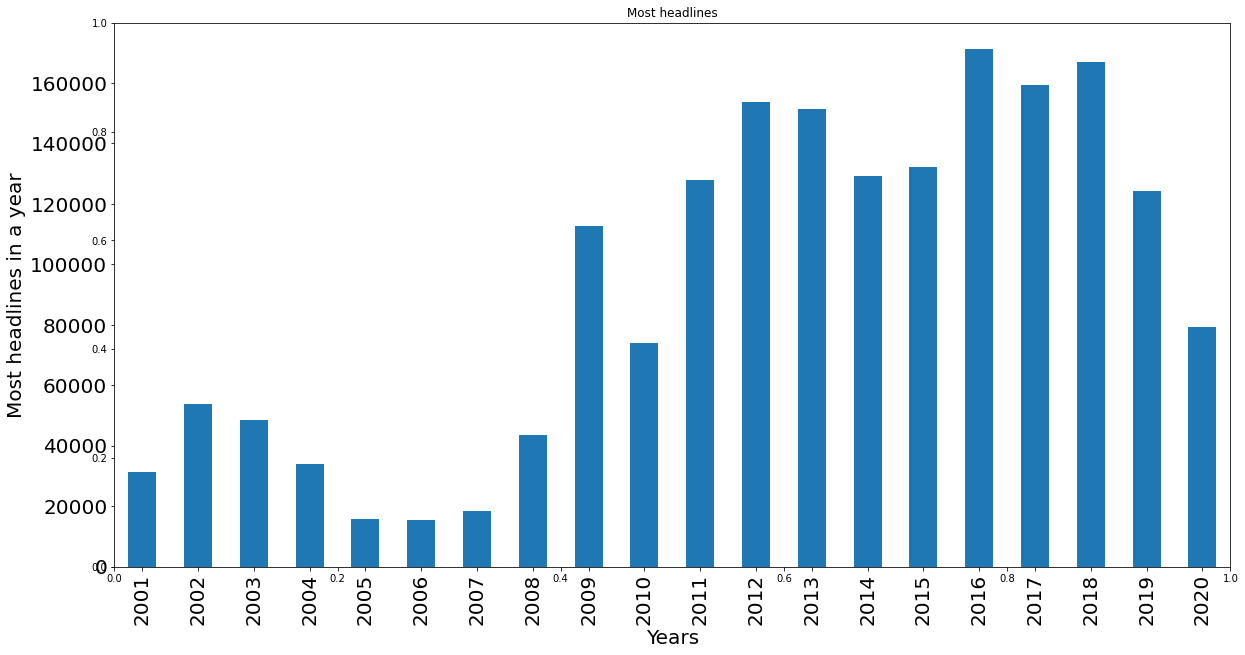

<Figure size 1440x720 with 0 Axes>

In [25]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_vise_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Most headlines" ,fontsize = 20)
a.set_ylabel('Most headlines in a year',fontsize=20)
a.set_xlabel("Years",fontsize = 20)



plt.show()

**Observation**: We can find that **2016** has the most news headlines.

### **3. Topic Most Covered**

In [26]:
dataset.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [27]:
new_dataset = dataset.copy()

In [28]:
new_dataset['category'] = new_dataset['headline_category'].str.split('.').map(lambda x: x[0])

In [29]:
new_dataset.head()

,publish_date,headline_category,headline_text,category
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,sports
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,unknown
2,20010102,unknown,Fissures in Hurriyat over Pak visit,unknown
3,20010102,unknown,America's unwanted heading for India?,unknown
4,20010102,unknown,For bigwigs; it is destination Goa,unknown


**3.1 Finding the top most category**

In [30]:
new_dataset_top_categoris = new_dataset.groupby(['category']).agg({'headline_text':'count'}).sort_values(by = 'headline_text',ascending =False)

In [31]:
new_dataset_top_categoris_top = new_dataset_top_categoris.drop(['unknown','tv','top-stories','city','citizen','edit-page','top-headlines','world']).head(10)
new_dataset_top_categoris_top

,headline_text
category,
india,285619
entertainment,224877
business,153876
sports,129494
home,77208
life-style,43370
tech,37220
news,13987
elections,9003


In [32]:
new_dataset_top_categoris_top.reset_index(inplace = True)
new_dataset_top_categoris_top

,category,headline_text
0,india,285619
1,entertainment,224877
2,business,153876
3,sports,129494
4,home,77208
5,life-style,43370
6,tech,37220
7,news,13987
8,elections,9003
9,delhi-times,7356


**Observation**: We can find that **India, Entertainment and business** are the most categories.

**3.2 Visualizing**

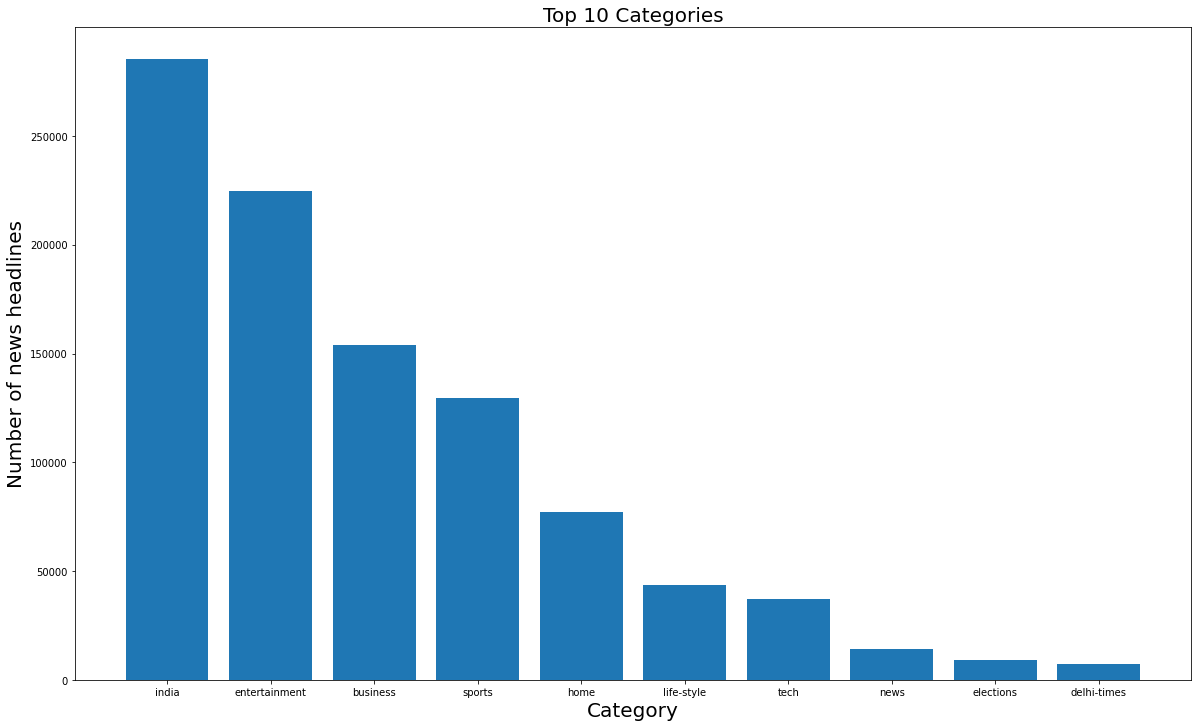

In [33]:
plt.figure(figsize=(20,12))
plt.bar(new_dataset_top_categoris_top.category, height=new_dataset_top_categoris_top.headline_text)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Number of news headlines',fontsize = 20)
plt.title('Top 10 Categories',fontsize = 20)
plt.show()

### **4. Sentimental Analysis**

**4.1 Sentimental Analysis using TextBlob**

In [34]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [38]:
dataset['Result'] = np.array([getAnalysis_polarity(headline)
for headline in dataset['headline_text']])

In [39]:
dataset.head()

,publish_date,headline_category,headline_text,Result
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,positive
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral
2,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral
3,20010102,unknown,America's unwanted heading for India?,neutral
4,20010102,unknown,For bigwigs; it is destination Goa,neutral


**4.2 Categoring the Variables**

In [40]:
summary = dataset.groupby(['Result']).agg({'headline_text' : 'count'})

**4.3 Visualizing the summary**

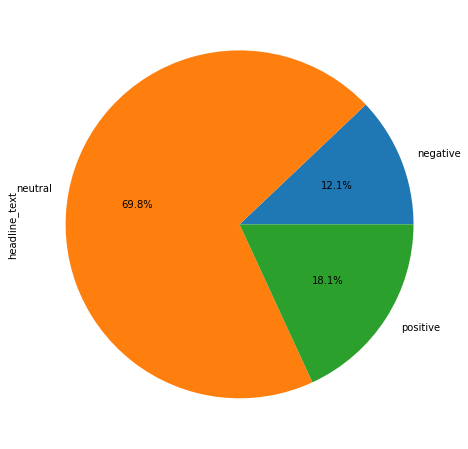

In [41]:
plt.figure(figsize = (8,8))
summary['headline_text'].plot.pie(autopct = '%1.1f%%')
plt.show()

In [44]:
negative = (summary.loc['negative'] / len(dataset))*100
neutral = (summary.loc['neutral'] / len(dataset))*100
positive = (summary.loc['positive'] / len(dataset))*100

In [46]:
print(' Positive Headlines: ' , positive )
print('\n\n Negative Headlines: ' ,negative )
print('\n\n Neutral Headlines: ' , str(neutral))

 Positive Headlines:  headline_text    18.11792
Name: positive, dtype: float64


 Negative Headlines:  headline_text    12.076834
Name: negative, dtype: float64


 Neutral Headlines:  headline_text    69.805245
Name: neutral, dtype: float64


**Conclusion**: We can observe that there are most of neutral headlines overall